# Banking Behavior of Individual Users

Financial transactions data are closely guarded by banks, which makes (anonymized) public datasets almost non-existent. This is unfortunate, since banking behavior has many interesting particularities. I've worked within banks in the past and often felt like sharing related insights. 

Thankfully, a Czech bank did build such a dataset for a Data Mining challenge in 1999, and it seems that this remains - 20 years later - the only one. Also known as the "Berka dataset", I got my copy [here]( https://data.world/lpetrocelli/czech-financial-dataset-real-anonymized-transactions) (and put a backup [here](http://data.paulosalem.com/datasets/pkdd99_discovery_challenge_banking_dataset.zip)).

In the present notebook we will simply look at what individual users' transactions look like. **Before looking at the charts and insights here, try to guess what you are going to find out.** In hindsight, a lot of things might seem obvious, so it is worth doing this exercise to appreciate the value of this kind of data.


## Setup 

In [1]:
import pandas as pd
import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

import random
random.seed(3)

In [2]:
plt.rcParams['figure.figsize'] = [15, 10]

## Data input

Data is assumed to be on the `data/` folder. Note that you might have to download it yourself and put it alongside this notebook.

In [3]:
df_trans = pd.read_csv('data/trans.csv', parse_dates=['date'], infer_datetime_format=True)


/home/salem/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df_trans.head()

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
0,695247,2378,1993-01-01,PRIJEM,VKLAD,700.0,700.0,NaN,NaN,NaN
1,171812,576,1993-01-01,PRIJEM,VKLAD,900.0,900.0,NaN,NaN,NaN
2,207264,704,1993-01-01,PRIJEM,VKLAD,1000.0,1000.0,NaN,NaN,NaN
3,1117247,3818,1993-01-01,PRIJEM,VKLAD,600.0,600.0,NaN,NaN,NaN
4,579373,1972,1993-01-02,PRIJEM,VKLAD,400.0,400.0,NaN,NaN,NaN


## Aggregate analyses

Before looking individual transacions' history, it is instructive to consider all transactions together first. 

To begin with, how many accounts we have?

In [5]:
account_ids = df_trans['account_id'].unique()

In [6]:
len(account_ids)

4500

Can customers have negative balance

In [7]:
account_ids_negative =df_trans[df_trans['balance'] < 0]['account_id'].unique()

In [8]:
len(account_ids_negative)

288

What the distribution of balances look like?

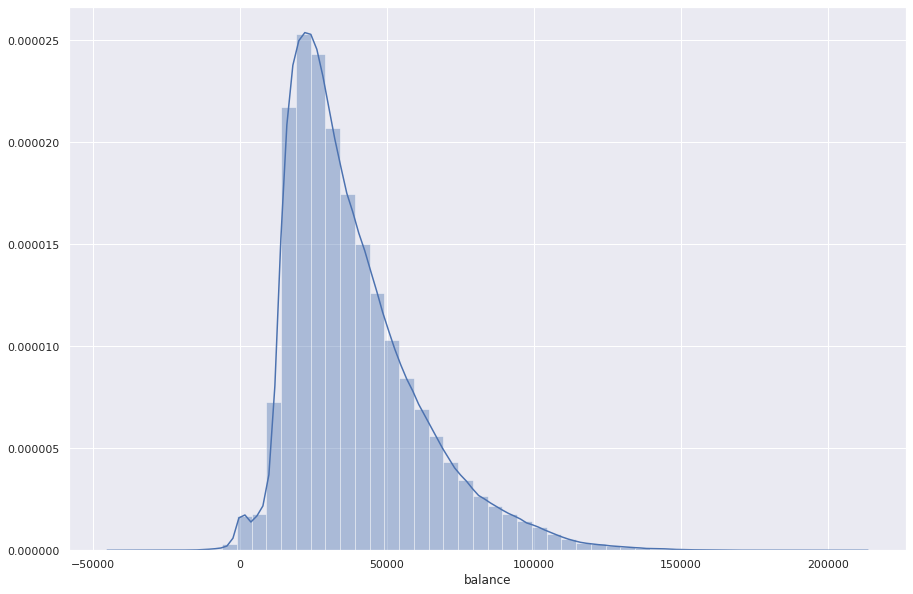

In [9]:
sns.distplot(df_trans['balance'])

Interestingly, balance seems to follow a [Log-Normal distribution](https://en.wikipedia.org/wiki/Log-normal_distribution), not a Normal one. This makes sense: it is harder to have a lot of money.

## Individual user behavior

Let us now isolate each individual.

In [10]:
users_transacions = {} # account id -> dataframe with transactions

In [11]:
for acc_id in account_ids:
    users_transacions[acc_id] = df_trans[df_trans['account_id'] == acc_id]

We need a function to plot the user's balance.

In [12]:
def plot_user(acc_id, users_transactions=users_transacions, same_figure=False):
    df_u = users_transacions[acc_id]
    s_balance = df_u.groupby(df_u['date'])['balance'].mean()
    s_balance.plot(title=f'Acc. ID = {acc_id}')
    if not same_figure:
        plt.show()

Let us pick a few random users to plot.

In [13]:
account_ids_to_plot = random.sample(list(account_ids), k=40)

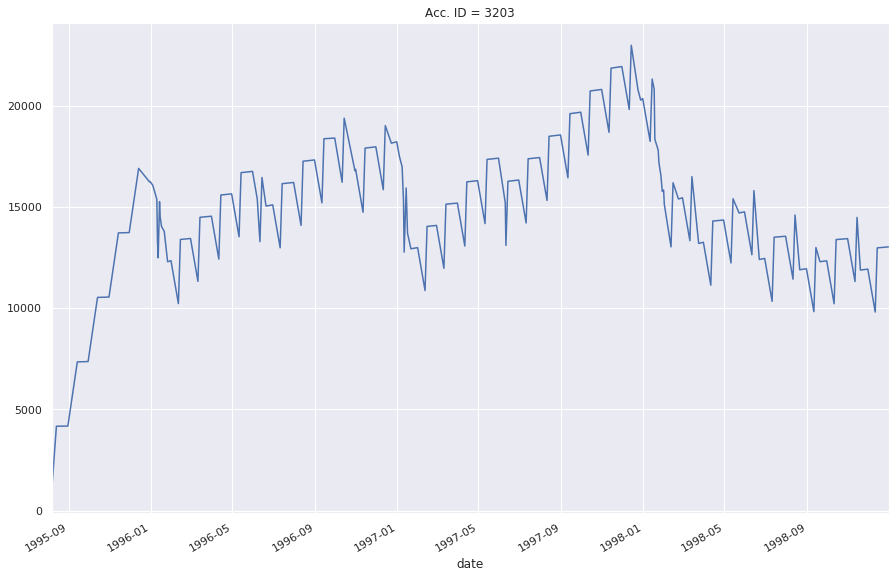

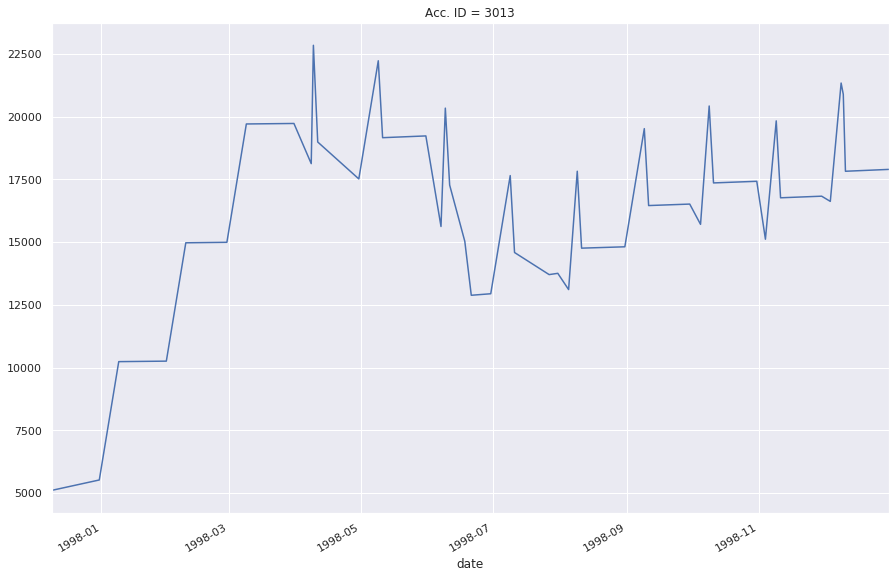

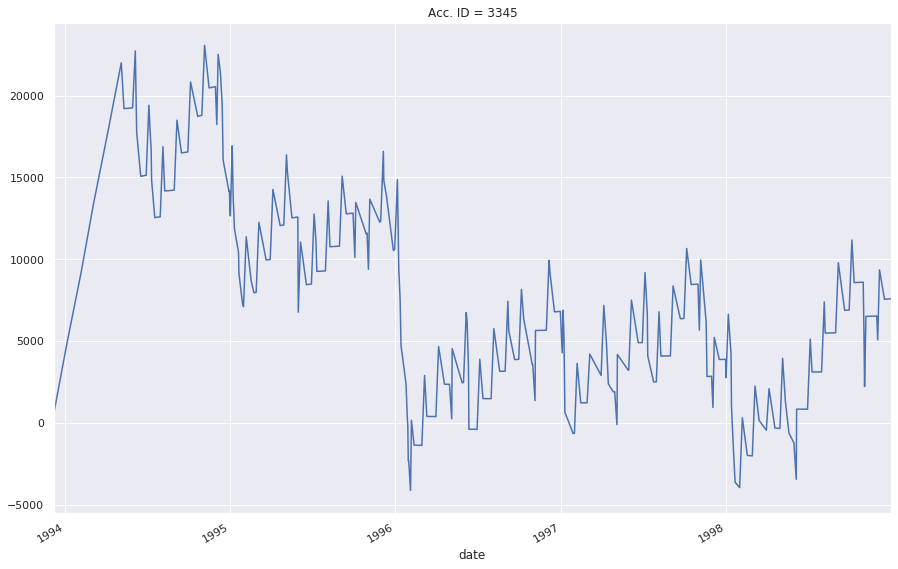

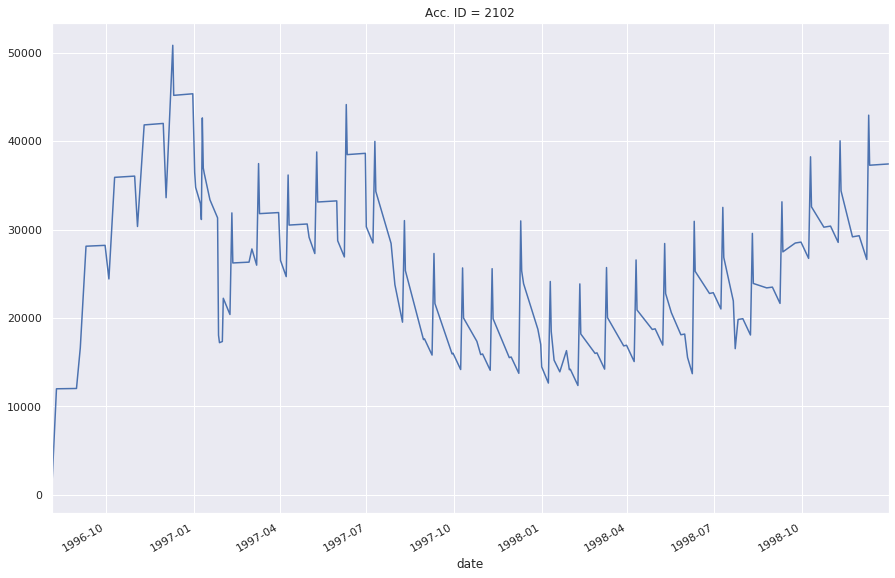

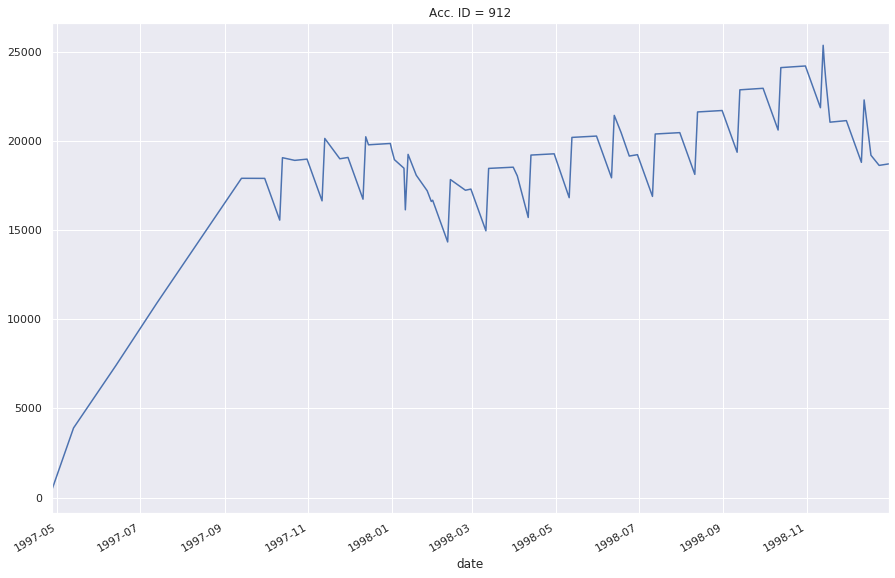

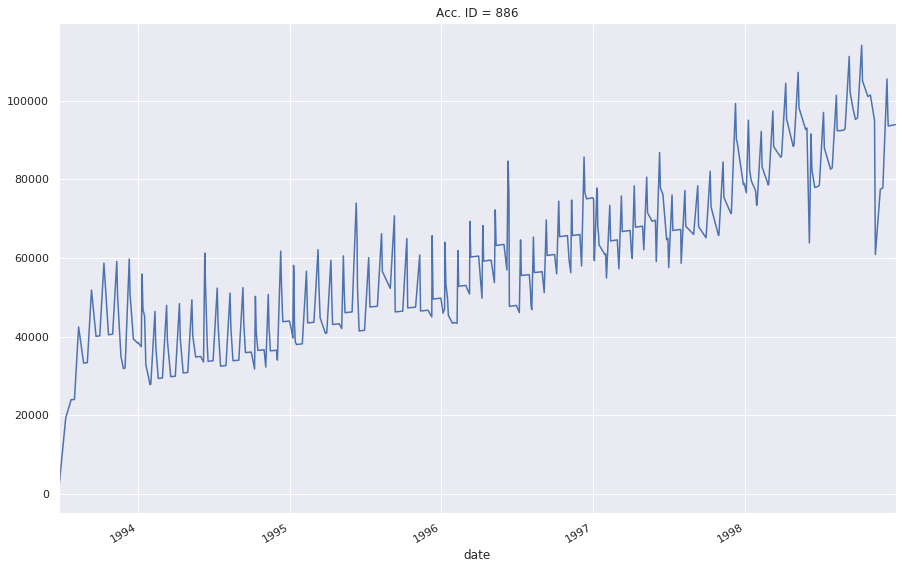

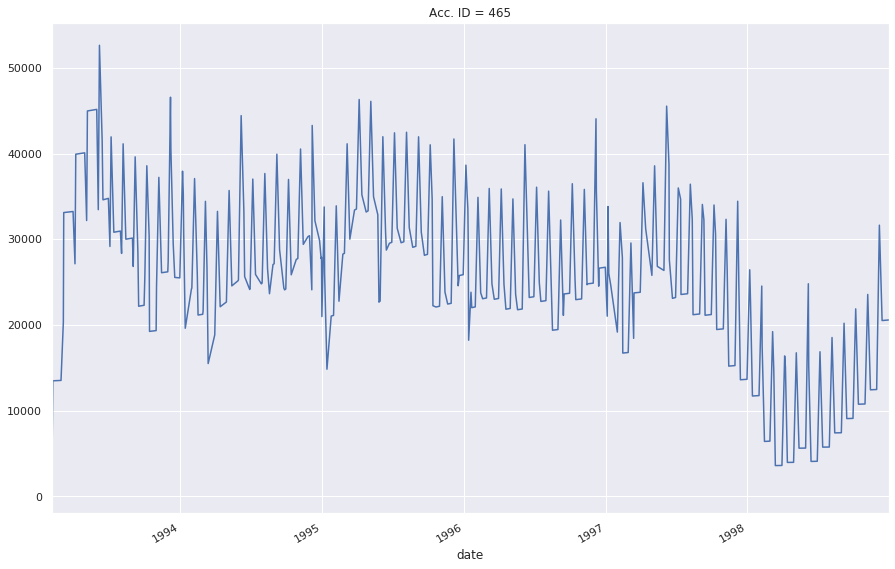

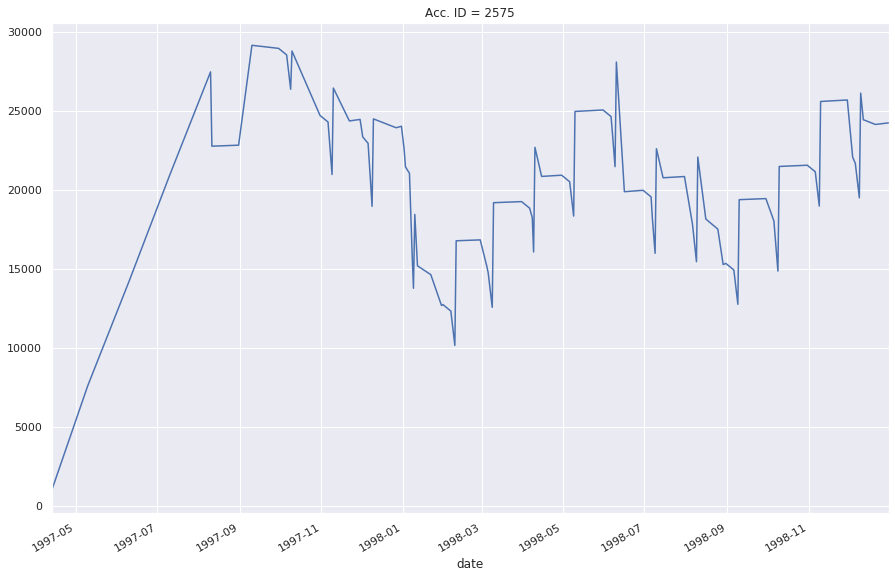

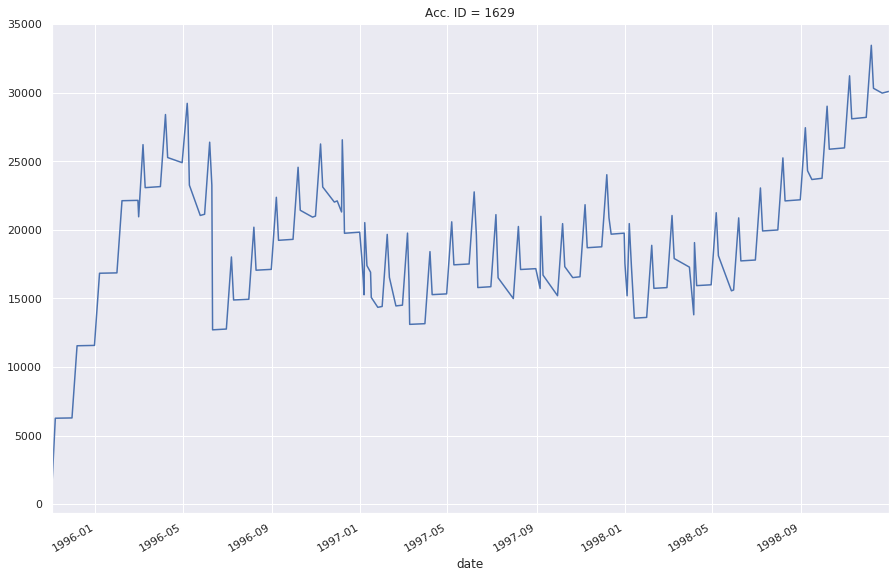

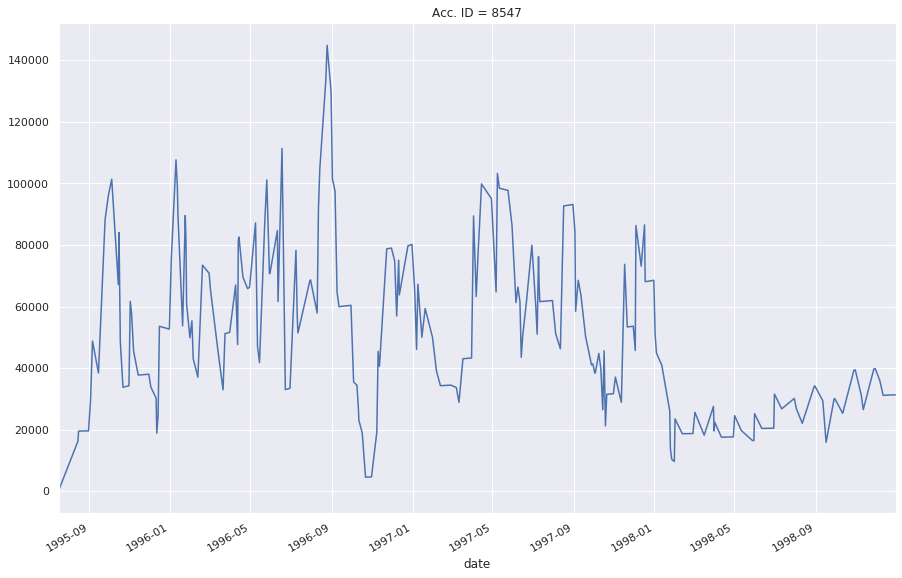

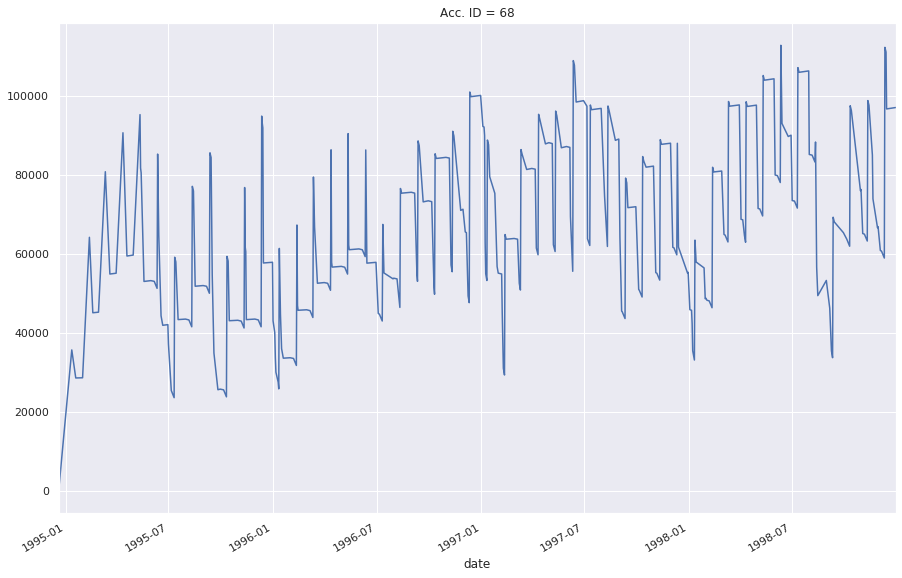

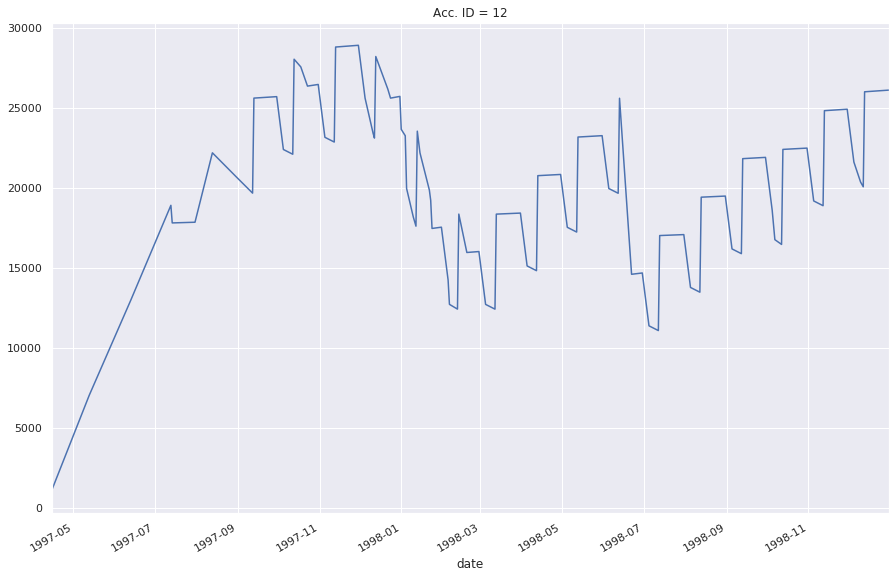

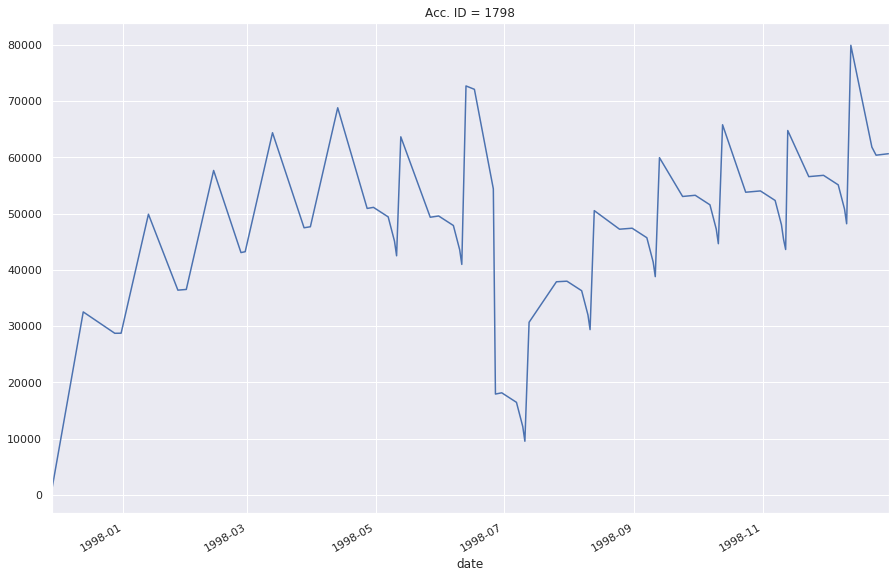

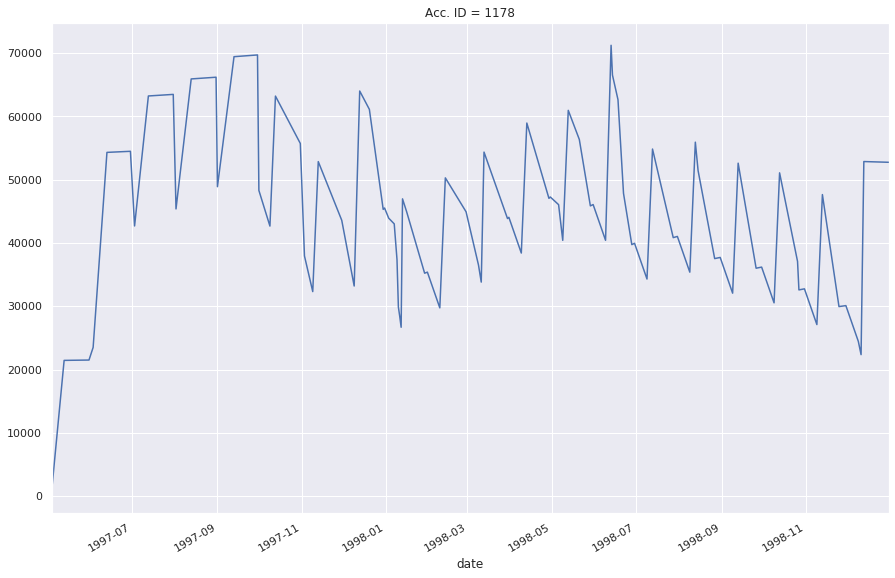

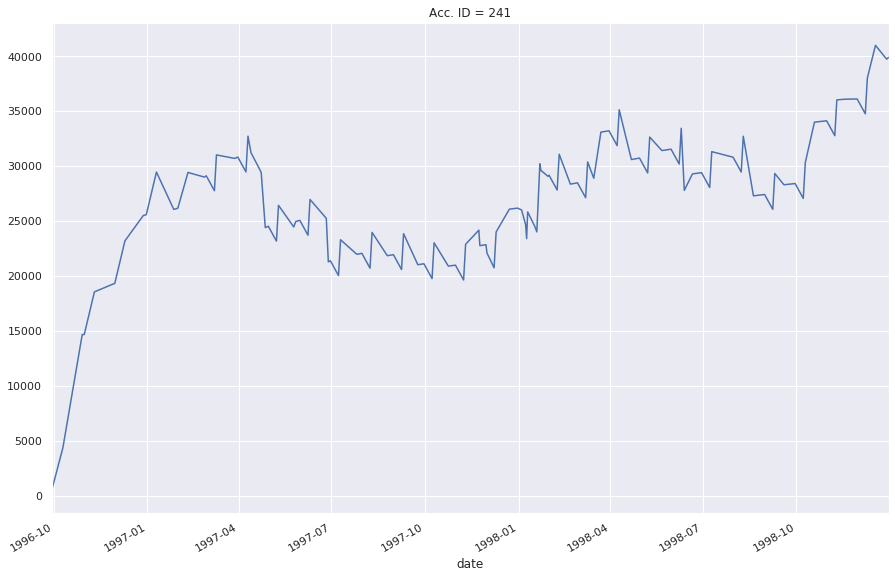

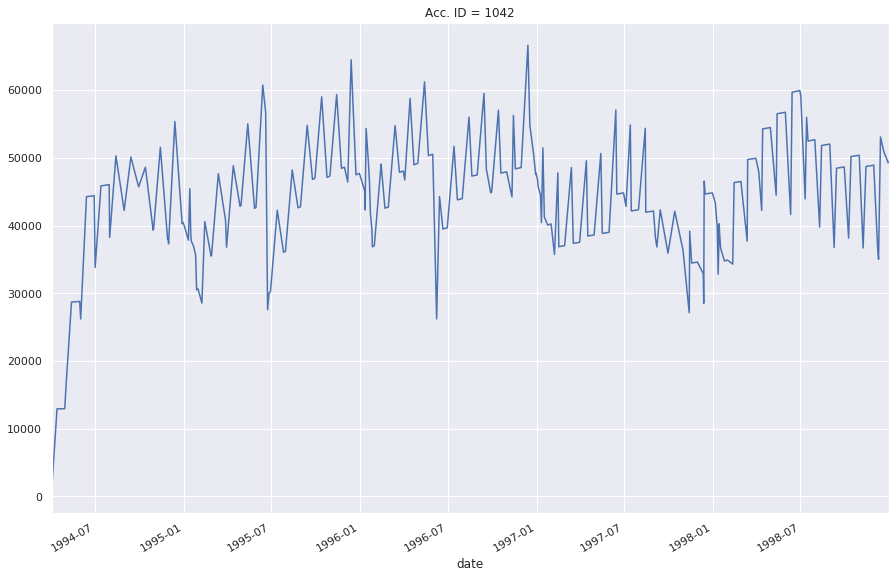

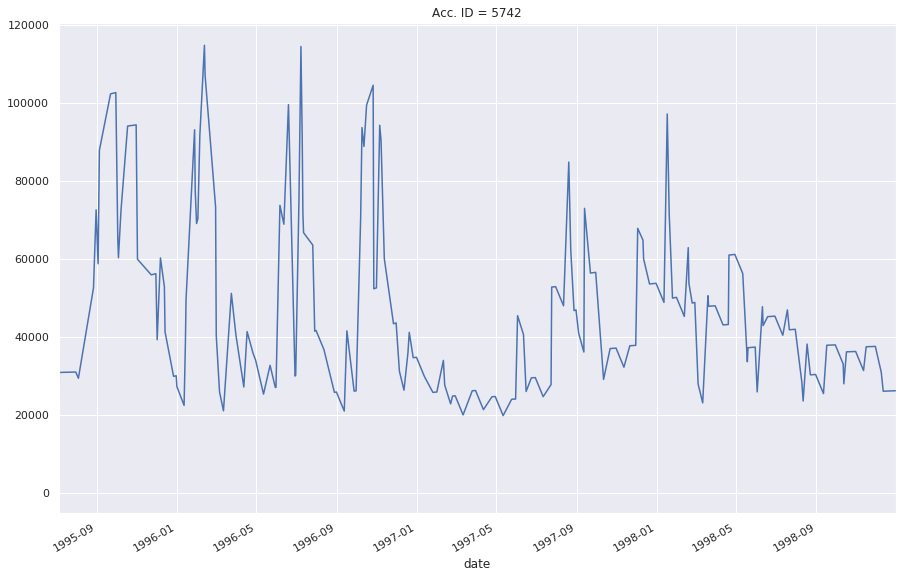

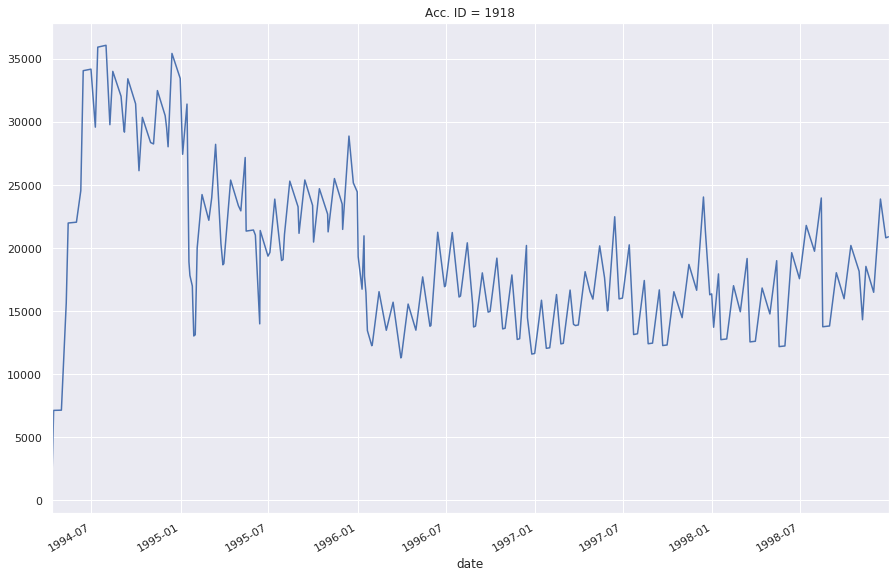

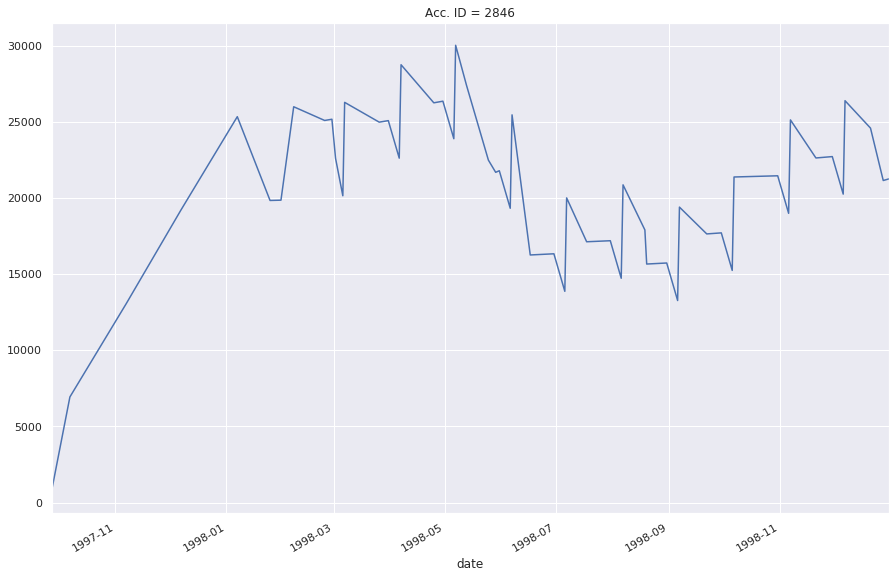

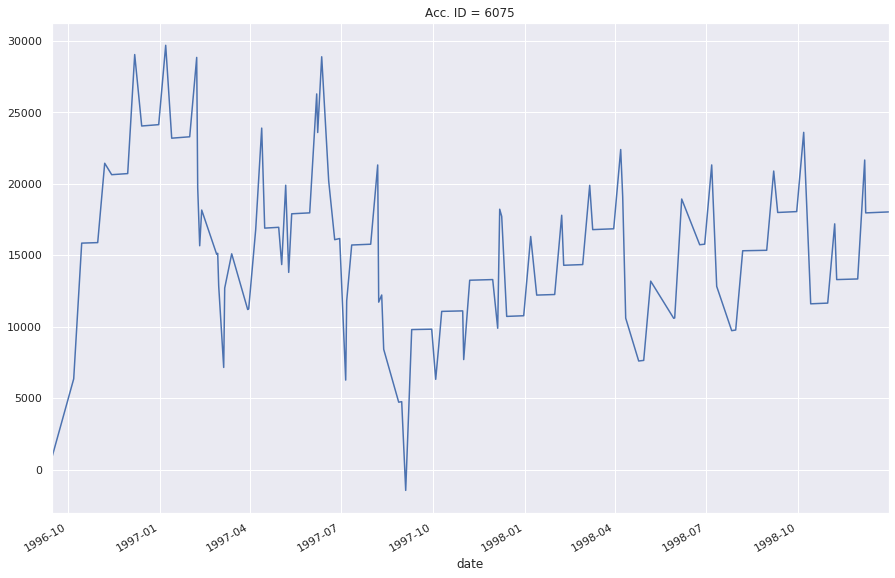

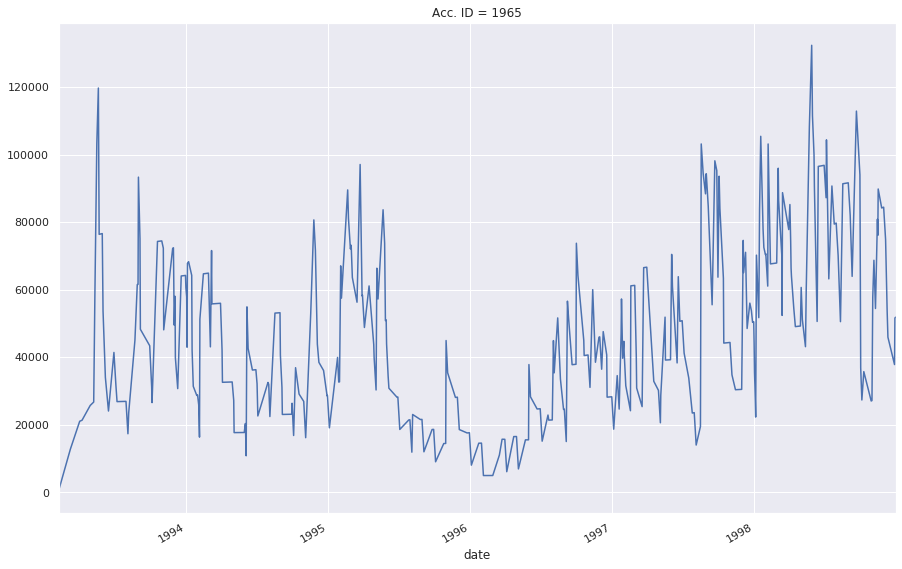

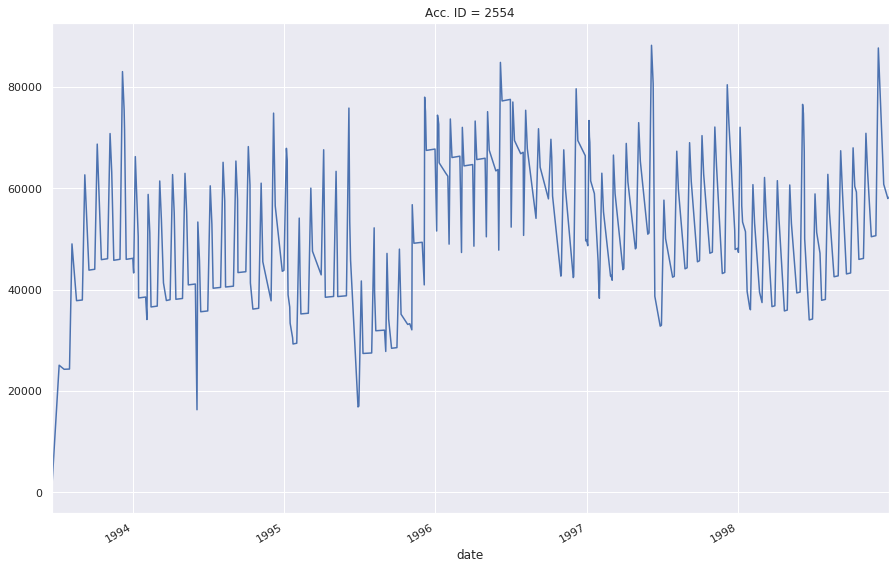

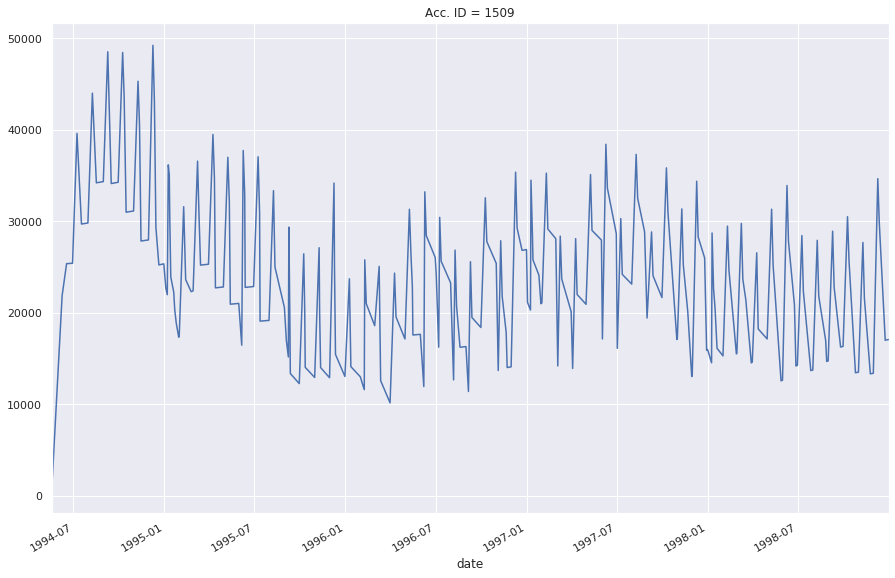

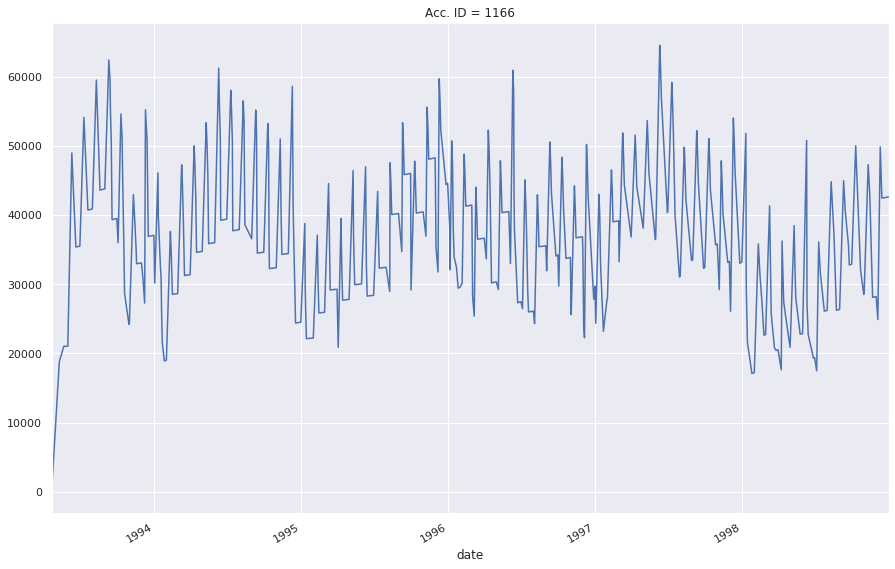

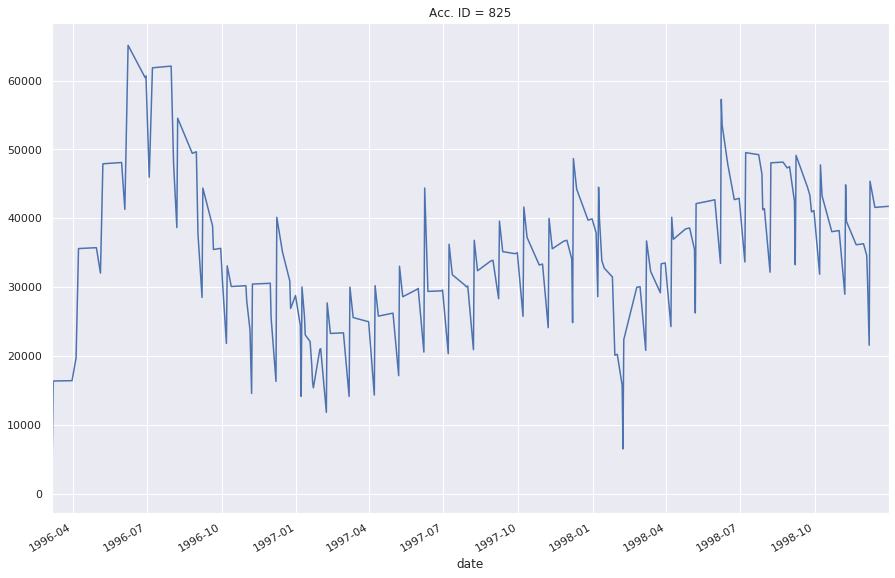

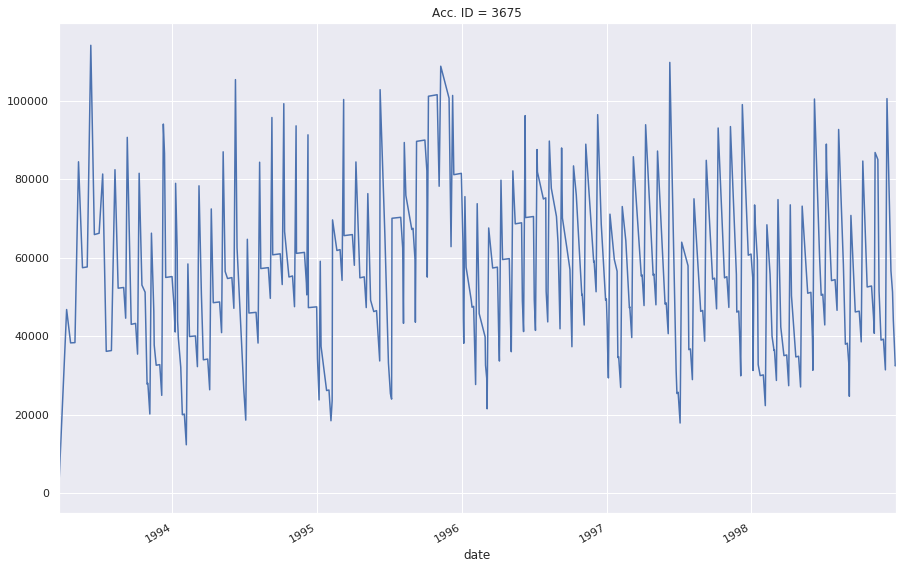

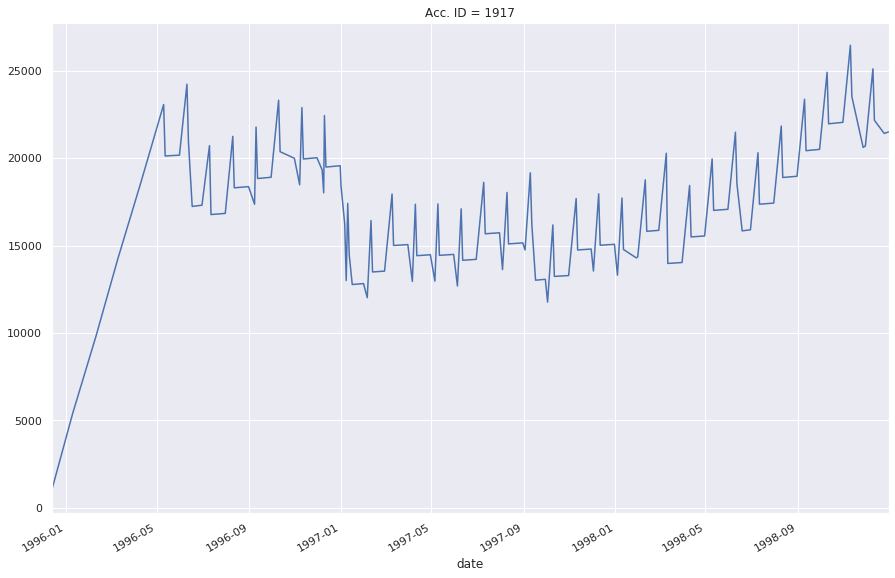

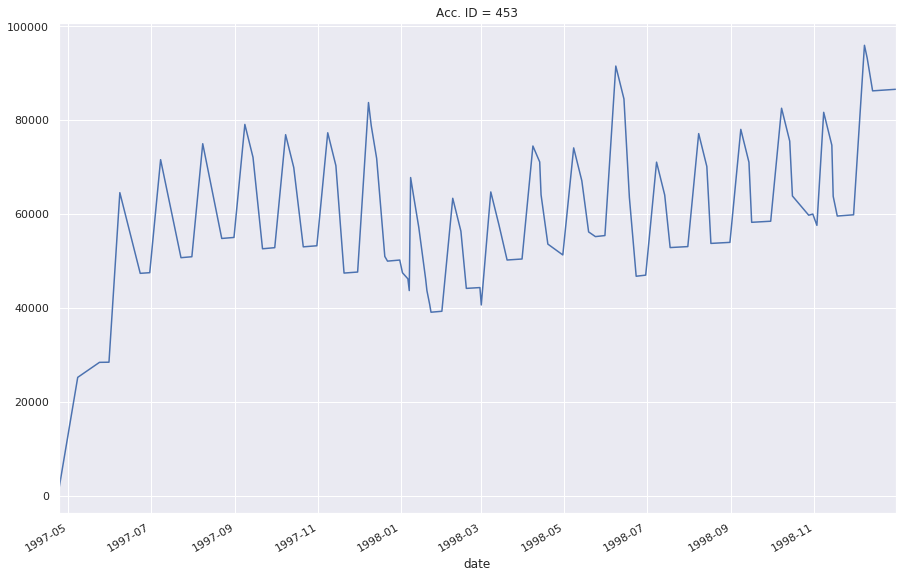

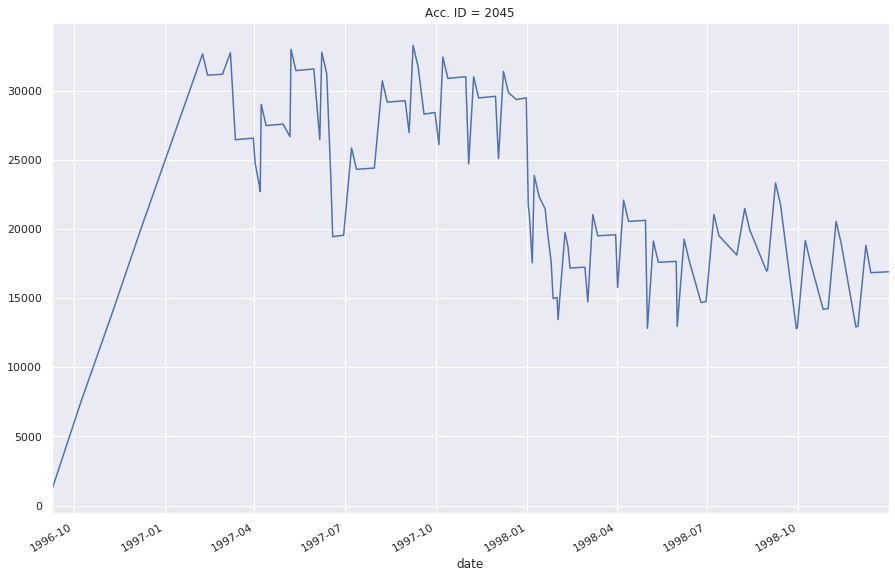

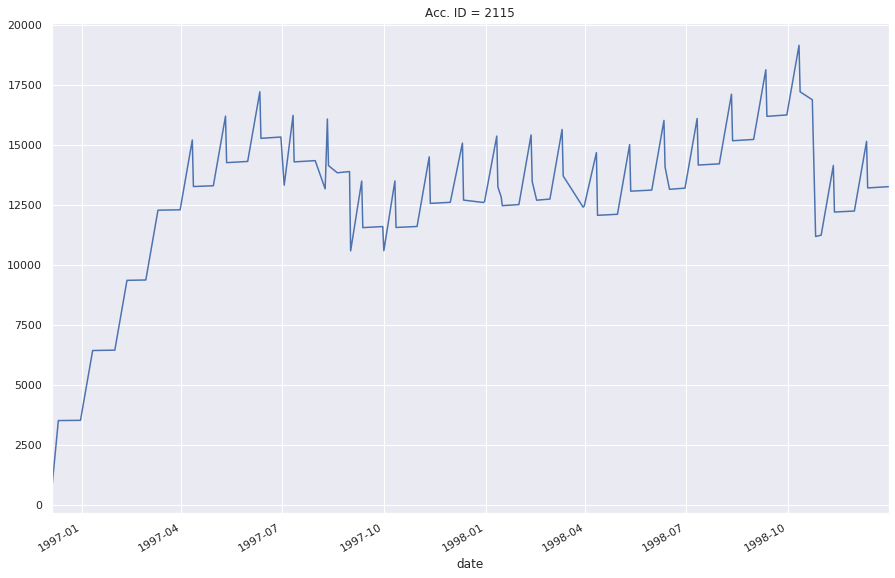

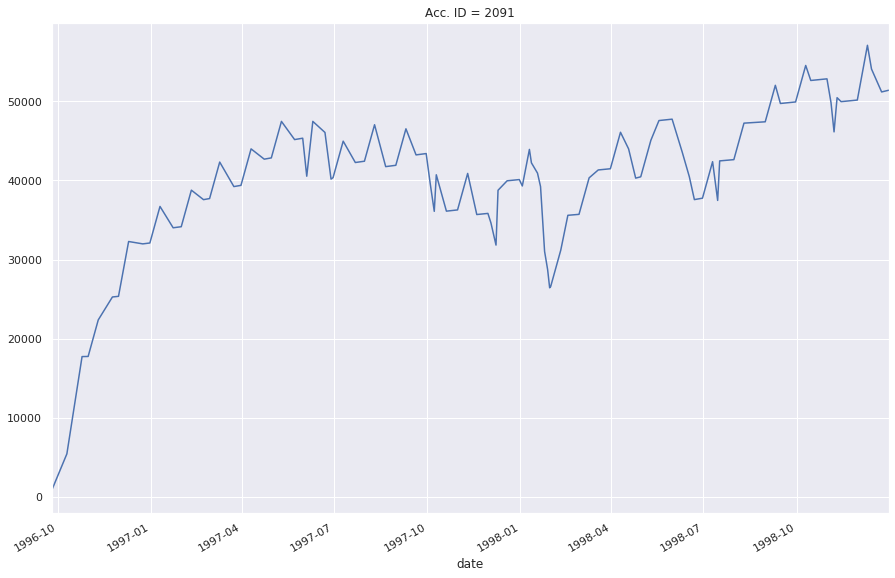

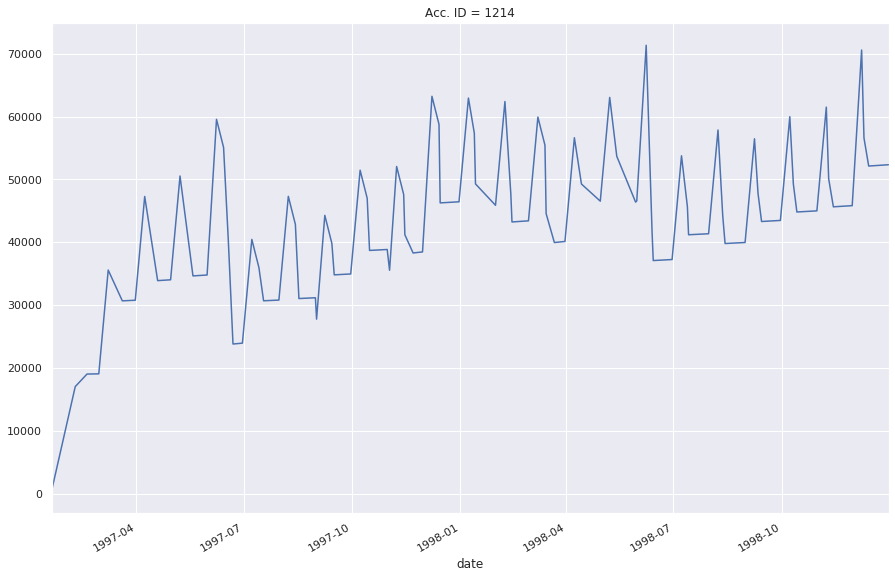

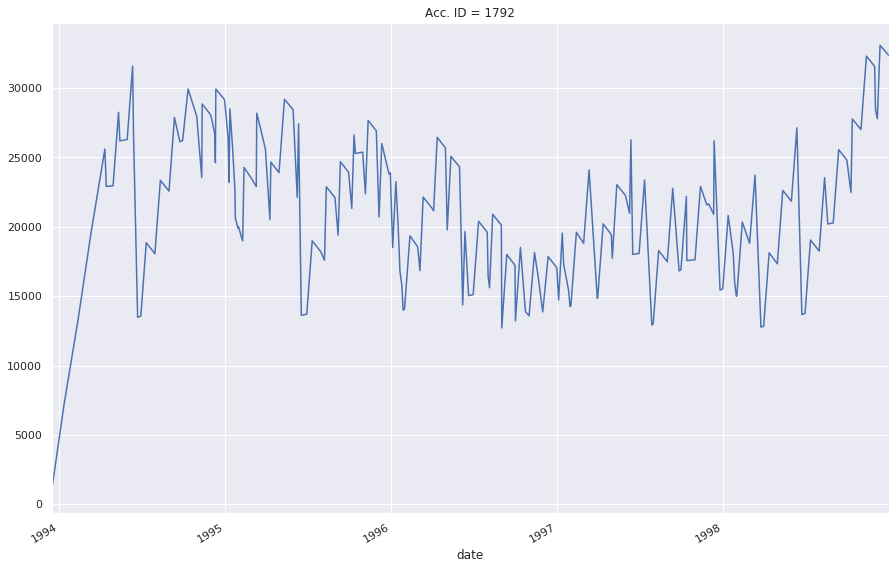

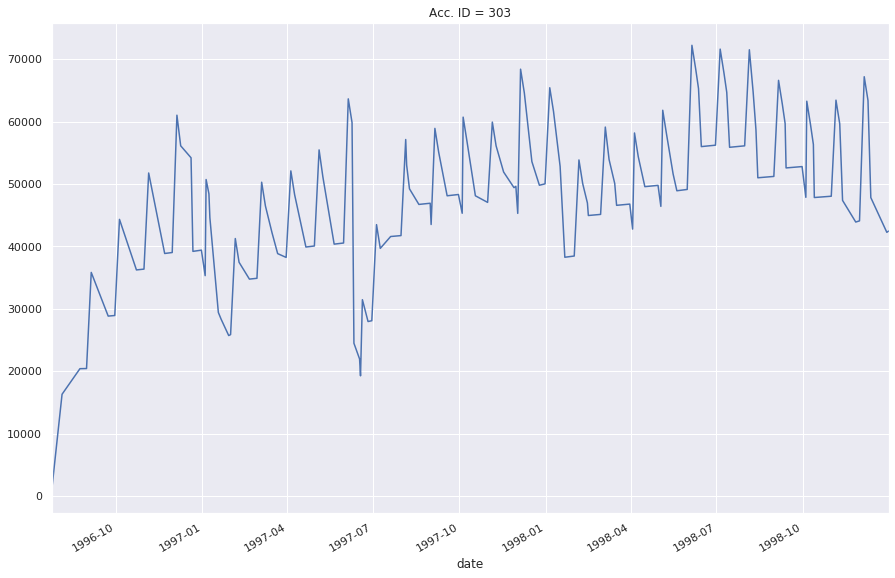

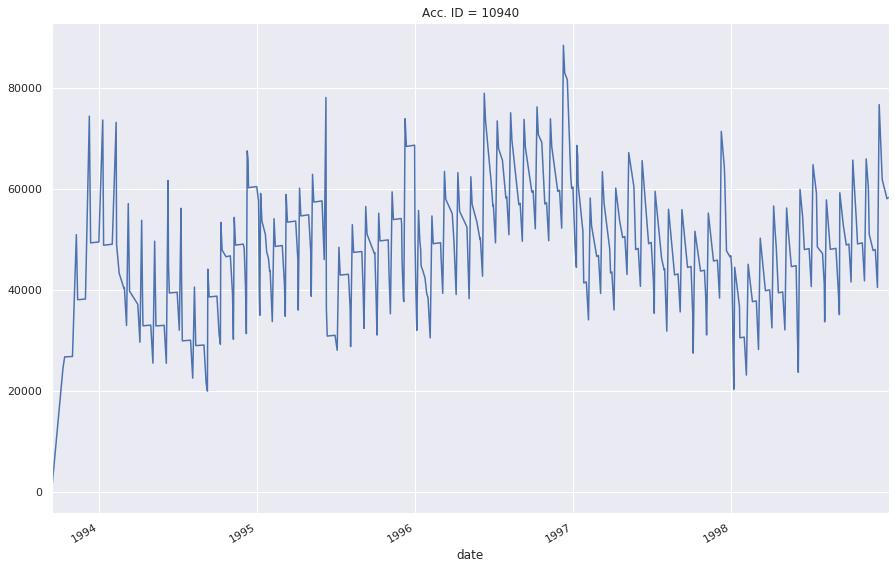

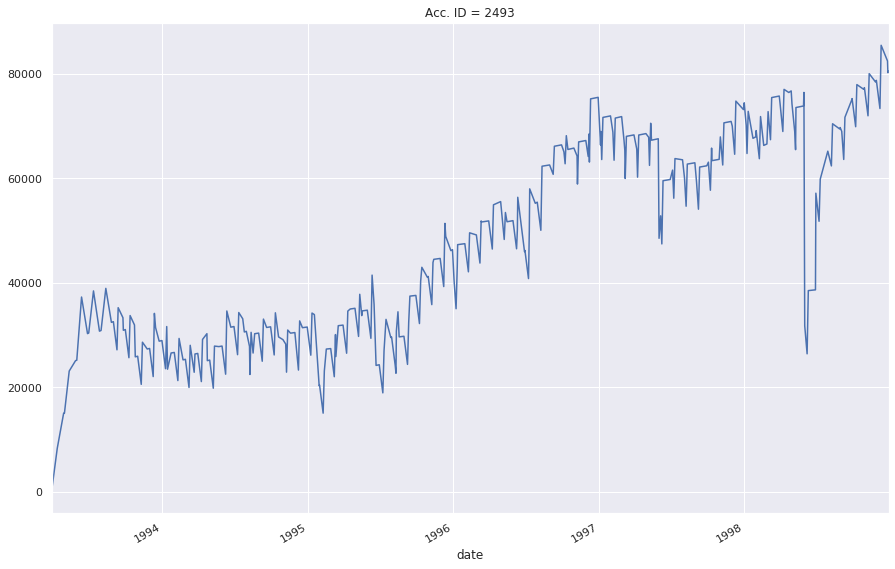

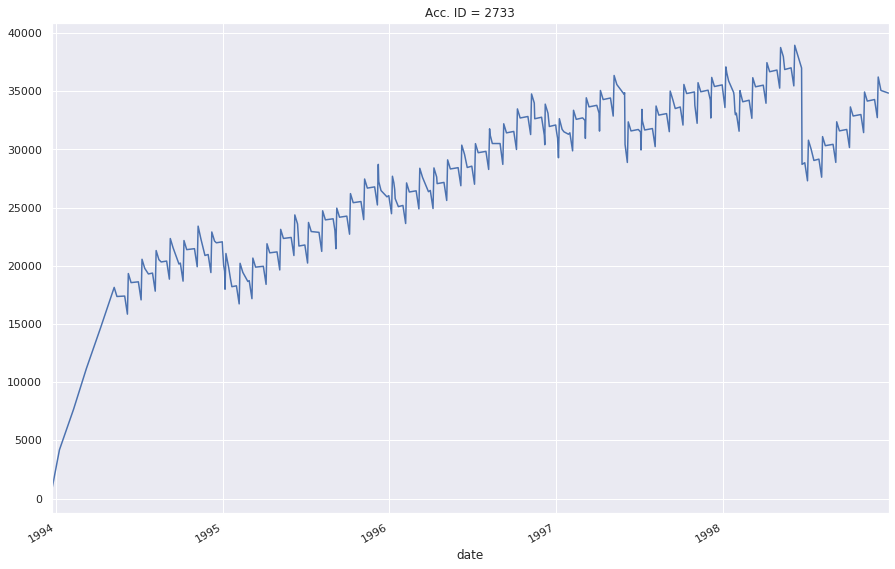

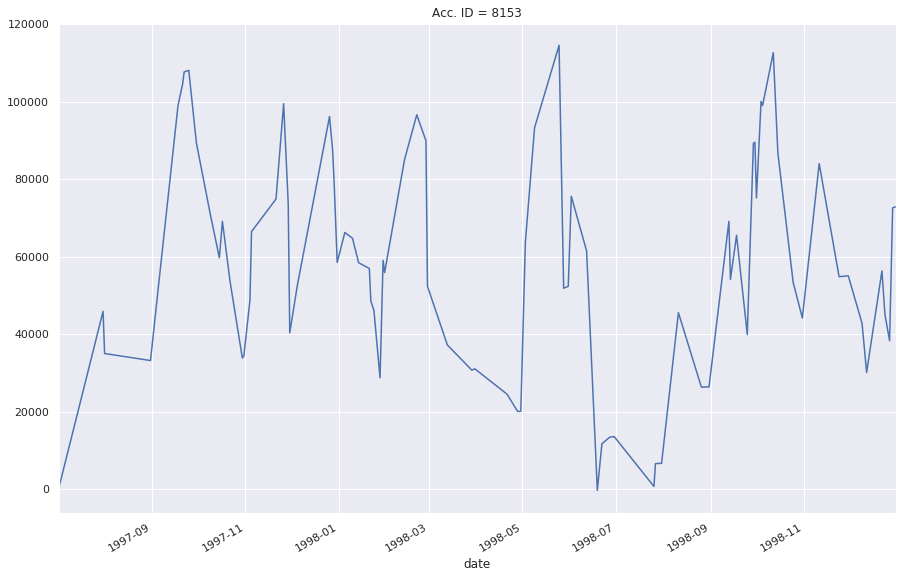

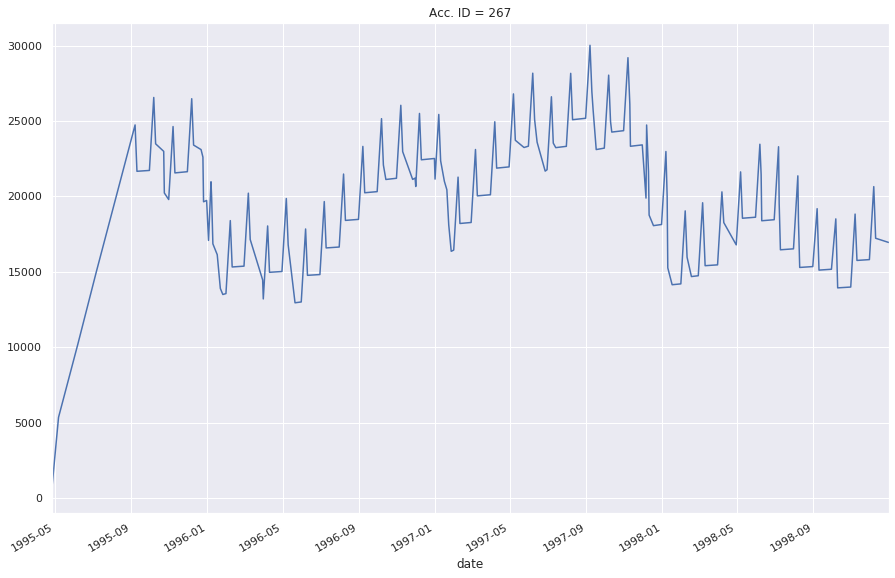

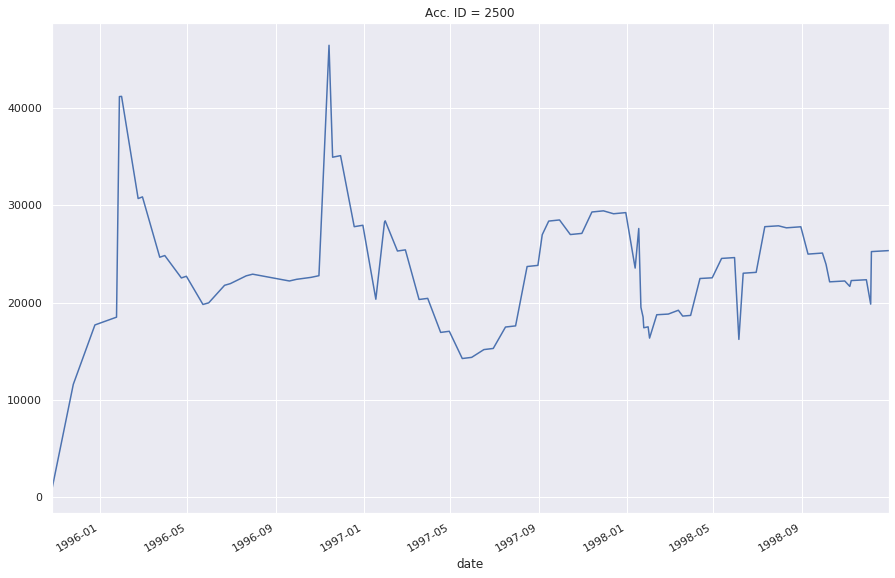

In [14]:
for acc_id in account_ids_to_plot:
    plot_user(acc_id)

We can note the following:
  - Viewed in the scale of days, balance is cyclic, presumably because the accounts are used to receive income, which is used later. This is a "capacitor-like" behavior: it charges up quickly, then discharges as needed.
  - Furtheremore, viewed in the scale of months or years, another cyclic behavior often takes place. This is harder to account for. There are seasonal spending effects (e.g., Christmas), but it could also be related, for instance, to the economic cycle as a whole.
  - In many cases there are rupture points, in which a certain behavioral pattern suddently changes in some way.
  - Ruptures can be limited to a sudden change in the value of balance, which then resumes its regular behavior (though starting from a higher or lower base).

Let us see some of these users in a single chart, to get a sense of relative scale.

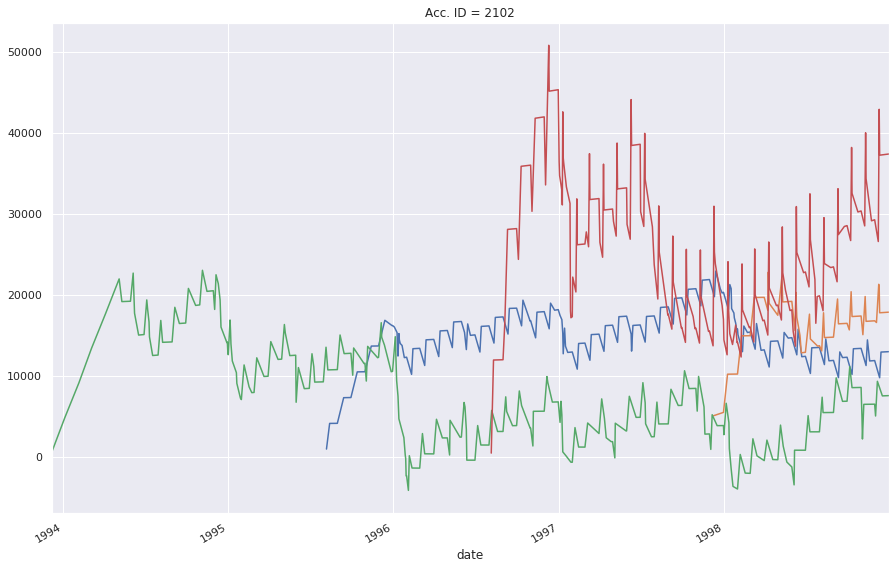

In [15]:
for acc_id in account_ids_to_plot[:4]:
    plot_user(acc_id, same_figure=True)

Some seasonal behavior shared by the customers is apparent. At the end of the year, behavior changes considerably for many of them. The change itself varies: some will spend more, whereas others will save more.

## Conclusion

From the above examination, it is clear that transacional financial behavior is highly structured. That is to be expected, since they are generated by average people going through their lives as best as they can. By actually looking to the data, we were able to hypothesize concrete factors of *how* people actually live. These insights could, in turn, allow the construction of products to help customers to manage their financial affairs.